In [1]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x = df.drop('label', axis=1) / 255
y = df['label']

In [5]:
pca = PCA(n_components=10)
X_10dim = pca.fit_transform(x)
X_10dim.shape

(42000, 10)

In [69]:
pd.DataFrame(X_10dim).describe()

,0,1,2,3,4,5,6,7,8,9
count,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04
mean,-1.854178e-16,-1.216381e-16,-8.018982e-17,2.446297e-16,-4.584692e-17,-1.708686e-17,-2.184073e-16,4.104230e-16,-2.647618e-17,9.473903e-18
std,2.269029e+00,1.944580e+00,1.801583e+00,1.685483e+00,1.607700e+00,1.507502e+00,1.315536e+00,1.235856e+00,1.208810e+00,1.113758e+00
min,-4.216151e+00,-5.549888e+00,-5.520829e+00,-5.959391e+00,-5.027097e+00,-4.842133e+00,-4.374475e+00,-4.194309e+00,-4.287945e+00,-3.982281e+00
25%,-1.575850e+00,-1.434004e+00,-1.281675e+00,-1.206616e+00,-1.078502e+00,-1.036369e+00,-9.455341e-01,-8.377286e-01,-8.685497e-01,-7.189715e-01
50%,-2.143034e-01,-3.189209e-01,6.156117e-02,2.260338e-02,4.041205e-02,3.417340e-02,-5.986877e-02,-1.161431e-01,-6.075598e-02,4.478061e-02
75%,1.319526e+00,1.503772e+00,1.248438e+00,1.061215e+00,1.094066e+00,1.054087e+00,8.927593e-01,7.814007e-01,8.212272e-01,7.821356e-01
max,9.370983e+00,5.817707e+00,5.766745e+00,6.129690e+00,5.311826e+00,4.993639e+00,4.978589e+00,4.646796e+00,5.980008e+00,4.046471e+00


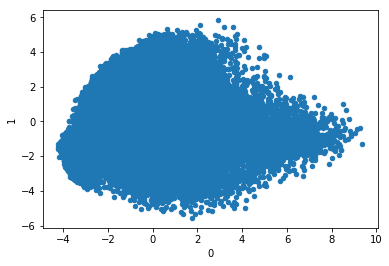

In [6]:
#plot top two components
pd.DataFrame(X_10dim, columns=range(0,10)).drop(range(2,10), axis=1).plot(x=0, y=1, kind='scatter')

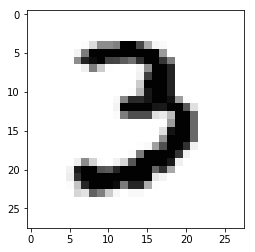

In [7]:
plt.imshow(x.values[9].reshape((28,28)), cmap='Greys')

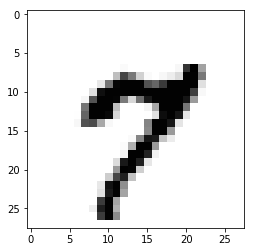

In [8]:
plt.imshow(x.values[657].reshape((28,28)), cmap='Greys')

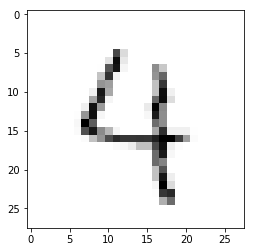

In [9]:
plt.imshow(x.values[999].reshape((28,28)), cmap='Greys')

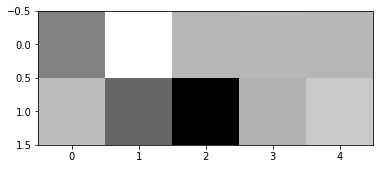

In [10]:
plt.imshow(X_10dim[9].reshape((2,5)), cmap='Greys')

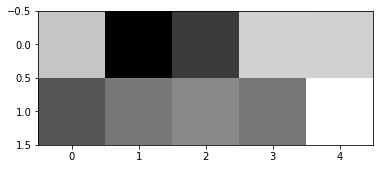

In [11]:
plt.imshow(X_10dim[657].reshape((2,5)), cmap='Greys')

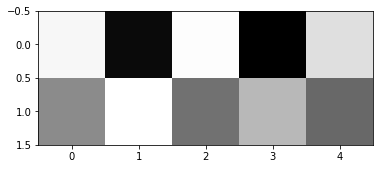

In [12]:
plt.imshow(X_10dim[999].reshape((2,5)), cmap='Greys')

For this homework, perform the following with the MNIST data:

Use PCA to reduce the dimensionality

a. How many components did you use? Why?

10 because there are 10 unique digits in the set.

b. Plot the first two components. Do you notice any trends? What is this plot showing us?

The plot shows us that there is significant variance in both components, so it did a good job. Additionally there is a different spread across the first component looks symmetric about the mean but the zeroeth feature looks unbalanced because the values past 0 look like they have different correlation with the first feature.

c. Why would you use PCA? What is it doing? And what are the drawbacks?

To reduce the dimensionality issue. All the features are the same type of data so its should be able to be condensed well. It is reducing the number of dimensions of our data at the cost of losing information about our data.


d. Plot some of the images, then compress them using PCA and plot again. How does it look?

It looks like grey-scale trash. 


In [13]:
from sklearn.manifold import TSNE

In [63]:
df = pd.read_csv('train.csv')
df_cluster = df.sample(n=10000)

In [64]:
x = df_cluster.drop('label', axis=1) / 255
y = df_cluster['label']

In [30]:
pca = PCA(n_components=50)
X_50dim = pca.fit_transform(x)


tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=500, learning_rate=10000)
tsne_results = tsne.fit_transform(X_50dim)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.031s...
[t-SNE] Computed neighbors for 10000 samples in 15.688s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.931043
[t-SNE] KL divergence after 250 iterations with early exaggeration: 93.060265
[t-SNE] KL divergence after 500 iterations: 1.725438


In [31]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y.values

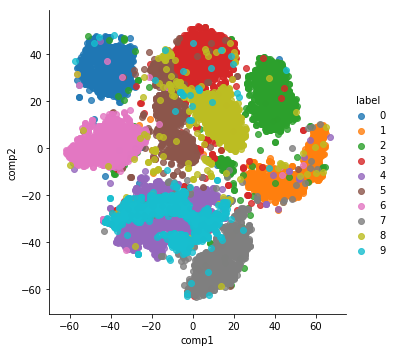

In [32]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

Use t-SNE to plot the first two components (you should probably random sample around 10000 points):

a. How does this plot differ from your PCA plot?

It visually shows 10 different clusters which is easier to interpret.

b. How robust is it to changes in perplexity?

1st time 10ish cluster not well labelled. p=50
2nd time it looks more like a ball p=10
3rd time its looks even more like a ball p=5
4th time it looks a lot more clustery P=100



c. How robust is it to different learning rate and number of iterations?
Weirdly shaped clusters iter=250
Looks pretty good iter=500
Looks great iter=1000

Looks good learning rate=1000
Looks great learning rate=200
Looks even better learning rate=10000


In [54]:
from sklearn.cluster import KMeans

In [65]:
kmeans = KMeans(n_clusters=10, n_init=50, n_jobs=-1)
kmeans.fit(x)
sk_clusters = kmeans.predict(x)

In [56]:
pd.Series(sk_clusters).head()

0    8
1    9
2    0
3    3
4    4
dtype: int32

In [57]:
pca = PCA(n_components=50)
X_50dim = pca.fit_transform(x)


tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=500, learning_rate=10000)
tsne_results = tsne.fit_transform(X_50dim)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.031s...
[t-SNE] Computed neighbors for 10000 samples in 15.729s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.930739
[t-SNE] KL divergence after 250 iterations with early exaggeration: 93.016792
[t-SNE] KL divergence after 500 iterations: 1.724164


In [59]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = sk_clusters

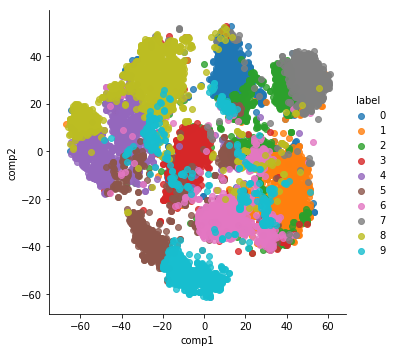

In [60]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

In [61]:
from sklearn.metrics import silhouette_score

In [66]:
kmeans_model = KMeans(n_clusters=5, n_init=50, n_jobs=-1).fit(x)
labels = kmeans_model.labels_
silhouette_score(x, labels, metric='euclidean')

0.0658318956105675

Perform k-means clustering:

a. How did you choose k?

We choose 10 because there are 10 digits

b. How did you evaluate your clustering?

We used the silhouette_score to measure it


c. Visualize your clusters using t-sne

The K-means struggled a lot more than PCA. There are clusters but it isn't differentiating them very well

d. Did you scale your data?

Yes we divided the pixel values by 255

e. How robust is your clustering?

Based on our silhouette score our data is not as clustered as it could have been. The score was around .06 the whole time.

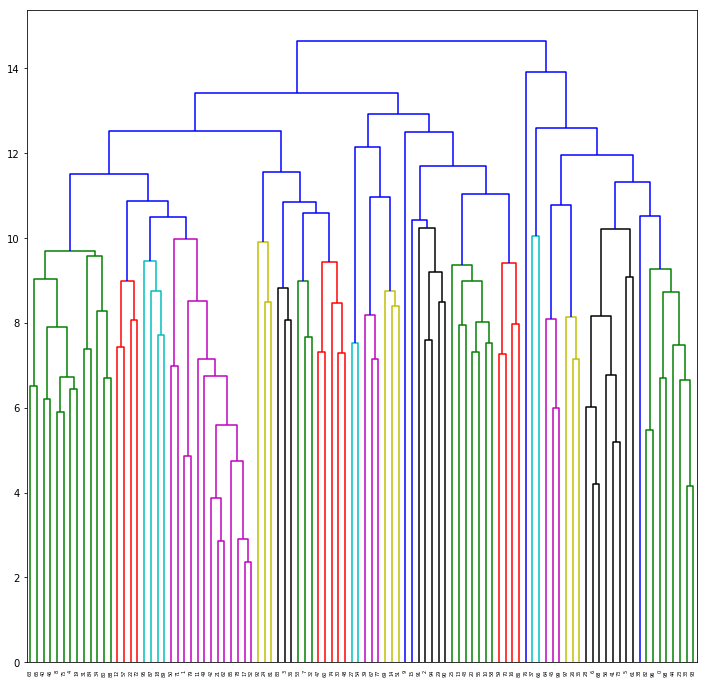

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(x[:100], 'complete')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)

Perform hierarchical clustering:

a. Plot your dendrogram

b. How many clusters seem reasonable based off your graph?

A lot more than 10, maybe like 15-20.

c. How does your dendrogram change with different linkage methods?

the single doesn't cluster anything at all
average seems like it is mislabelling some of them and the labels are unbalanced
weighted looks similar to single
centroid looks really bad and dones't make a lot of sense. It only identified three clusters.